In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('F:/Data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

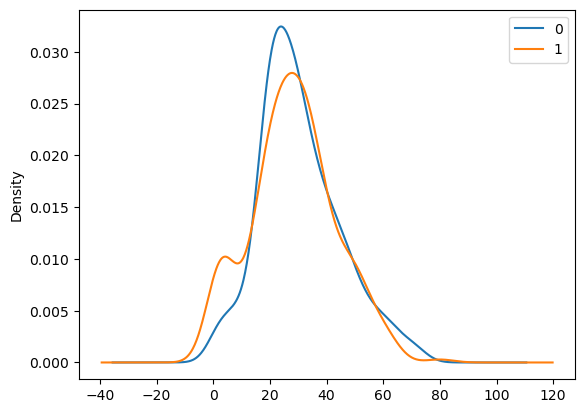

In [7]:
df.groupby('Survived')['Age'].plot(kind = 'kde', legend = True)

In [8]:
factors = ['Pclass', 'SibSp']
df[['Survived'] + factors].corr()

,Survived,Pclass,SibSp
Survived,1.000000,-0.338481,-0.035322
Pclass,-0.338481,1.000000,0.083081
SibSp,-0.035322,0.083081,1.000000


In [34]:
df.sort_values(by = 'Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [35]:
df.groupby("Pclass").agg({"Survived": ["mean", "min", "max"]})

Survived        
            mean min max
Pclass                  
1       0.629630   0   1
2       0.472826   0   1
3       0.242363   0   1

In [41]:
print(df[(df.Pclass == 1) & (df.Survived == 1)].shape[0])
print(df[df.Pclass == 1].shape[0])

136
216


In [17]:
print(df[(df.Sex == 'male') & (df.Survived == 1)].shape[0])
print(df[df.Sex == 'male'].shape[0])

109
577


In [18]:
print(df[(df.Sex == 'female') & (df.Survived == 1)].shape[0])
print(df[df.Sex == 'female'].shape[0])

233
314


In [19]:
print(df[(df.Age <= 18) & (df.Survived == 1)].shape[0])
print(df[df.Age <= 18].shape[0])

70
139


In [20]:
print(df[((df.Age <= 35) & (df.Age > 18)) & (df.Survived == 1)].shape[0])
print(df[(df.Age <= 35) & (df.Age > 18)].shape[0])

137
358


In [21]:
print(df[((df.Age <= 60) & (df.Age > 35)) & (df.Survived == 1)].shape[0])
print(df[(df.Age <= 60) & (df.Age > 35)].shape[0])

78
195


In [22]:
print(df[(df.Age > 60) & (df.Survived == 1)].shape[0])
print(df[df.Age > 60].shape[0])

5
22


In [24]:
print(df[(df.Parch == 0) & (df.Survived == 1)].shape[0])
print(df[df.Parch == 0].shape[0])

233
678


In [37]:
print(df.groupby(['Sex', 'Pclass', 'Survived'])['PassengerId'].count())

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: PassengerId, dtype: int64


In [79]:
class DataAnalys:
    def __init__(self, file: str):
        self.data = pd.read_csv(file)

    def pclass_analys(self) -> pd.DataFrame:
        by_class = self.data.groupby(['Pclass', 'Survived'])['PassengerId'].count().unstack()
        by_class['%'] = by_class[1] / (by_class[1] + by_class[0]) * 100
        
        return by_class

    def family_analys(self) -> pd.DataFrame:
        by_family = self.data.groupby(['SibSp', 'Survived'])['PassengerId'].count().unstack(fill_value=0)
        by_family['%'] = by_family[1] / (by_family[1] + by_family[0]) * 100
        
        return by_family

    def parch_analys(self) -> pd.DataFrame:
        by_parch = self.data.groupby(['Parch', 'Survived'])['PassengerId'].count().unstack(fill_value=0)
        by_parch['%'] = by_parch[1] / (by_parch[1] + by_parch[0]) * 100

        return by_parch

    def sex_analys(self) -> pd.DataFrame:
        by_sex = self.data.groupby(['Sex', 'Pclass', 'Survived'])['PassengerId'].count().unstack(fill_value=0)
        by_sex['%'] = by_sex[1] / (by_sex[1] + by_sex[0]) * 100

        return by_sex

    def age_analys(self) -> pd.DataFrame:
        bins = [0, 18, 35, 60, 100]
        rows = ['Age <= 18', '18 < Age <= 35', '35 < Age <= 60', 'Age > 60']
        self.data['AgeGroup'] = pd.cut(self.data['Age'], bins=bins, labels=rows, right=False)
        by_age = self.data.groupby(['AgeGroup', 'Survived'], observed=False)['PassengerId'].count().unstack(fill_value=0)
        by_age['%'] = by_age[1] / (by_age[0] + by_age[1]) * 100
        
        return by_age
        

In [80]:
file = 'F:/Data/train.csv'
analyzer = DataAnalys(file)

# выживаемость в зависимости от класса
print('According to Pclass')
print(analyzer.pclass_analys())
print()

# выживаемость в зависимости от состава семьи
print('According to SibSp')
print(analyzer.family_analys())
print()

# выживаемость в зависимости от семьи
print('According to parch')
print(analyzer.parch_analys())
print()

# выживаемость в зависимости от пола и класса
print('According to Sex and Pclass')
print(analyzer.sex_analys())
print()

# выживаемость в зависимости от возраста
print('According to Age')
print(analyzer.age_analys())

According to Pclass
Survived    0    1          %
Pclass                       
1          80  136  62.962963
2          97   87  47.282609
3         372  119  24.236253

According to SibSp
Survived    0    1          %
SibSp                        
0         398  210  34.539474
1          97  112  53.588517
2          15   13  46.428571
3          12    4  25.000000
4          15    3  16.666667
5           5    0   0.000000
8           7    0   0.000000

According to parch
Survived    0    1          %
Parch                        
0         445  233  34.365782
1          53   65  55.084746
2          40   40  50.000000
3           2    3  60.000000
4           4    0   0.000000
5           4    1  20.000000
6           1    0   0.000000

According to Sex and Pclass
Survived         0   1          %
Sex    Pclass                    
female 1         3  91  96.808511
       2         6  70  92.105263
       3        72  72  50.000000
male   1        77  45  36.885246
       2        9